# Plot Published Data Vectors

In [1]:
import numpy as np
import sacc
import pandas as pd
import h5py as h
import matplotlib.pyplot as plt

In [2]:
data_dir = '/global/cscratch1/sd/elp25/TXPipe/data/hsc/outputs/'

In [3]:
n_src = 4

In [4]:
hsc_published_data = sacc.Sacc.load_fits(data_dir+'twopoint_data_real_published_blinded.sacc')

In [5]:
hsc_data = sacc.Sacc.load_fits(data_dir+'twopoint_data_real.sacc')

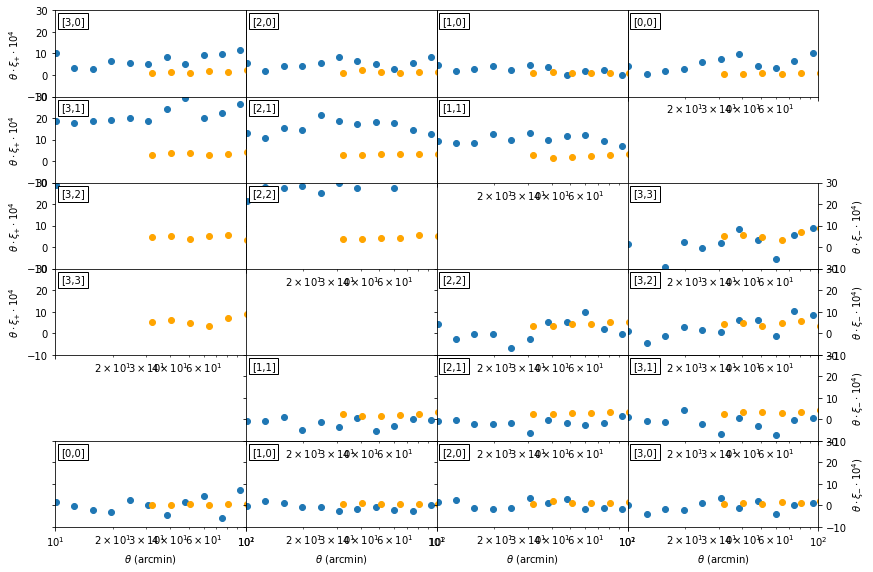

In [9]:
import sacc
#matplotlib.use('agg')
#matplotlib.rcParams["xtick.direction"]='in'
#matplotlib.rcParams["ytick.direction"]='in'


import sacc

xip = sacc.standard_types.galaxy_shear_xi_plus

source_tracers = set()
for b1, b2 in hsc_data.get_tracer_combinations(xip):
    source_tracers.add(b1)
    source_tracers.add(b2)

sources = list(sorted(source_tracers))

xip = sacc.standard_types.galaxy_shear_xi_plus
xim = sacc.standard_types.galaxy_shear_xi_minus
nsource = len(sources)

plt.figure(figsize=(nsource*3,(nsource)*2))

theta = hsc_data.get_tag('theta', xip)
tmin = np.min(theta)
tmax = np.max(theta)

n_src = 4

coord = lambda dt,i,j: (nsource+1-j, i) if dt==xim else (j, nsource-1-i)

for dt in [xip, xim]:
    for i in range(len(sources[:])):
        for j in range(len(sources[:])):

            D = hsc_data.get_data_points(dt, ('source_%s' %i,'source_%s' %j))

            if len(D)==0:
                continue

            ax = plt.subplot2grid((nsource+2, nsource), coord(dt,i,j))

            scale = 1e-4

            #theta = np.array([d.get_tag('theta') for d in D])
            #xi    = np.array([d.value for d in D])
            #err   = np.array([d.get_tag('error') for d  in D])
            #w = err>0
            #theta = theta[w]
            #xi = xi[w]
            #err = err[w]

            if dt==sacc.standard_types.galaxy_shear_xi_plus:
                theta, xi = hsc_data.get_theta_xi(
                'galaxy_shear_xi_plus', 
                'source_' + str(i), 
                'source_' + str(j),
                    )
            else:
                theta, xi = hsc_data.get_theta_xi(
                'galaxy_shear_xi_minus', 
                'source_' + str(i), 
                'source_' + str(j),
                    )

            plt.scatter(theta, xi*theta / scale, label='data')

            if dt==sacc.standard_types.galaxy_shear_xi_plus:
                theta, xi = hsc_published_data.get_theta_xi(
                'galaxy_shear_xi_plus', 
                'source_' + str(j), 
                'source_' + str(i),
                    )
            else:
                theta, xi = hsc_published_data.get_theta_xi(
                'galaxy_shear_xi_minus', 
                'source_' + str(j), 
                'source_' + str(i),
                    )

            plt.scatter(theta, xi*theta / scale, label='published results',color='orange')
            plt.xscale('log')
            plt.ylim(-10,30)
            plt.xlim(10, 100)

            if dt==xim:
                if j>0:
                    ax.set_xticklabels([])
                else:
                    plt.xlabel(r'$\theta$ (arcmin)')

                if i==nsource-1:
                    ax.yaxis.tick_right()
                    ax.yaxis.set_label_position("right")
                    ax.set_ylabel(r'$\theta \cdot \xi_{-} \cdot 10^4)$')
                else:
                    ax.set_yticklabels([])
            else:
                ax.set_xticklabels([])
                if i==nsource-1:
                    ax.set_ylabel(r'$\theta \cdot \xi_{+} \cdot 10^4$')
                else:
                    ax.set_yticklabels([])

            props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
            plt.text(0.03, 0.93, f'[{i},{j}]', transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)


plt.show()